<a href="https://colab.research.google.com/github/HebaSedik/deep-learning/blob/master/LSTM_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`dataset`***
https://github.com/jbrownlee/Datasets/blob/master/airline-passengers.csv

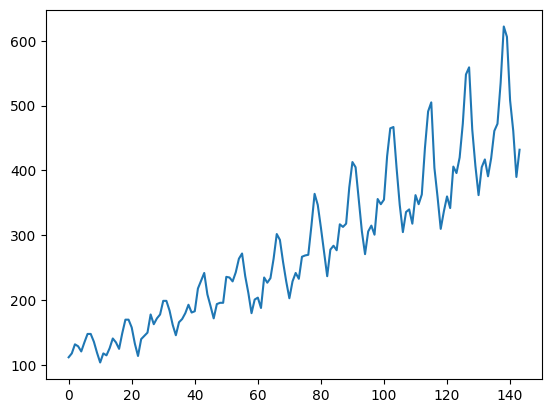

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = pandas.read_csv('/content/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
#normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 7s - loss: 0.0386 - 7s/epoch - 72ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0185 - 177ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0136 - 162ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0126 - 160ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0117 - 166ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0109 - 163ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0099 - 164ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0091 - 148ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0083 - 160ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0074 - 149ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0065 - 174ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0057 - 168ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0050 - 158ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0044 - 159ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0038 - 165ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0033 - 152ms/epoc

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 11ms/step
Train Score: 23.12 RMSE
Test Score: 52.03 RMSE


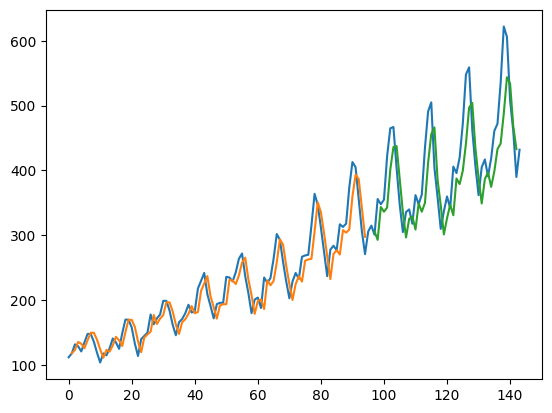

In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **using the window method**

Epoch 1/100
92/92 - 3s - loss: 0.0571 - 3s/epoch - 29ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0250 - 241ms/epoch - 3ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0157 - 230ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0133 - 258ms/epoch - 3ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0116 - 343ms/epoch - 4ms/step
Epoch 6/100
92/92 - 1s - loss: 0.0101 - 671ms/epoch - 7ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0088 - 388ms/epoch - 4ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0078 - 274ms/epoch - 3ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0066 - 295ms/epoch - 3ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0058 - 242ms/epoch - 3ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0052 - 159ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0048 - 169ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0044 - 162ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0042 - 177ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0040 - 158ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0039 - 152ms/epoc

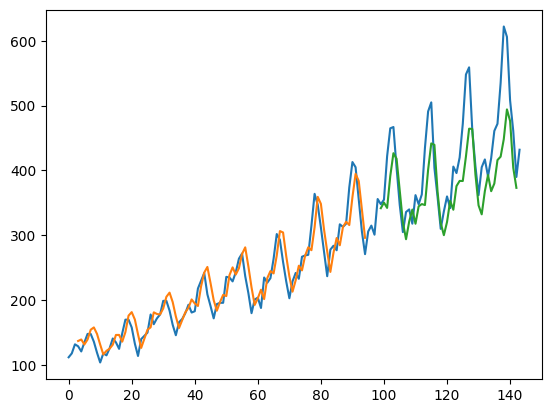

In [15]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()